In [1]:
from model.generator import Generator
from model.discriminator import Discriminator
from model.dcgan import DCGAN

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, Input, MaxPool2D, UpSampling2D, BatchNormalization, Activation, Dropout, ZeroPadding2D
%matplotlib inline

In [2]:
EPOCHS = 100
NOISE_DIM = 100

TRAIN_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\train"
TEST_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\test"
training_set = tf.keras.utils.image_dataset_from_directory(TRAIN_PATH, image_size = (64, 64), batch_size = 17)
test_set = tf.keras.utils.image_dataset_from_directory(TEST_PATH, image_size = (64, 64))

normalization_layer = tf.keras.layers.Rescaling(scale = (1./127.5), offset = -1)

normalized_training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
normalized_test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 391 files belonging to 1 classes.
Found 110 files belonging to 5 classes.


In [3]:
gan = DCGAN()

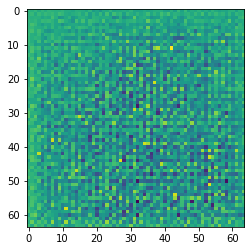

In [4]:
img = gan.generator(tf.random.normal([1,100]))

plt.imshow(img[0, :, :, 0])
plt.show()

In [6]:
print(gan.discriminator(img))

tf.Tensor([[0.4998668]], shape=(1, 1), dtype=float32)


In [7]:
#Train
gan.train(normalized_training_set, EPOCHS)

Epoch 1  -  Generator Loss: 0.04396349780904043	Discriminator Loss: 0.5051647054574657
Epoch 2  -  Generator Loss: 4.474765532148023e-09	Discriminator Loss: 0.5000071625960196
Epoch 3  -  Generator Loss: 3.1311766500271516e-08	Discriminator Loss: 0.5000039301516273
Epoch 4  -  Generator Loss: 1.4740452602938022e-08	Discriminator Loss: 0.5000032707139523
Epoch 5  -  Generator Loss: 5.5839165855777945e-08	Discriminator Loss: 0.5000029250319011
Epoch 6  -  

KeyboardInterrupt: 

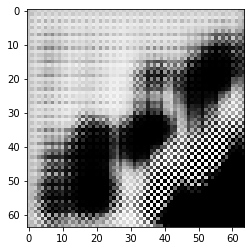

In [17]:
generated_img = gan.generator(tf.random.normal([1, 100]))
plt.imshow(generated_img[0, :, :, 0], cmap="gray")
plt.show()